# **Vaccine Usage Prediction**

### Step 1: Reading the dataset

In [1]:
# Importing the required library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.linear_model import SGDRegressor

In [2]:
#After reading the dataset, let’s check its top 5 rows using head() method to just see how the data looks.
df_vacc=pd.read_csv('/content/h1n1_vaccine_prediction.csv')
df_vacc.head()

,unique_id,h1n1_worry,h1n1_awareness,antiviral_medication,contact_avoidance,bought_face_mask,wash_hands_frequently,avoid_large_gatherings,reduced_outside_home_cont,avoid_touch_face,...,race,sex,income_level,marital_status,housing_status,employment,census_msa,no_of_adults,no_of_children,h1n1_vaccine
0,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,...,White,Female,Below Poverty,Not Married,Own,Not in Labor Force,Non-MSA,0.0,0.0,0
1,1,3.0,2.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,...,White,Male,Below Poverty,Not Married,Rent,Employed,"MSA, Not Principle City",0.0,0.0,0
2,2,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,White,Male,"<= $75,000, Above Poverty",Not Married,Own,Employed,"MSA, Not Principle City",2.0,0.0,0
3,3,1.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,...,White,Female,Below Poverty,Not Married,Rent,Not in Labor Force,"MSA, Principle City",0.0,0.0,0
4,4,2.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,...,White,Female,"<= $75,000, Above Poverty",Married,Own,Employed,"MSA, Not Principle City",1.0,0.0,0


In [3]:
df_vacc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26707 entries, 0 to 26706
Data columns (total 34 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   unique_id                  26707 non-null  int64  
 1   h1n1_worry                 26615 non-null  float64
 2   h1n1_awareness             26591 non-null  float64
 3   antiviral_medication       26636 non-null  float64
 4   contact_avoidance          26499 non-null  float64
 5   bought_face_mask           26688 non-null  float64
 6   wash_hands_frequently      26665 non-null  float64
 7   avoid_large_gatherings     26620 non-null  float64
 8   reduced_outside_home_cont  26625 non-null  float64
 9   avoid_touch_face           26579 non-null  float64
 10  dr_recc_h1n1_vacc          24547 non-null  float64
 11  dr_recc_seasonal_vacc      24547 non-null  float64
 12  chronic_medic_condition    25736 non-null  float64
 13  cont_child_undr_6_mnths    25887 non-null  flo

In [4]:
# Checking the shape of the dataset
df_vacc.shape

(26707, 34)

###  Step 2: Visualization 

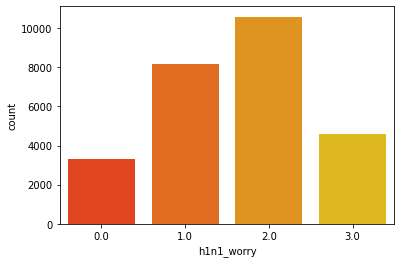

In [5]:
sns.countplot(x="h1n1_worry",data=df_vacc,palette='autumn')

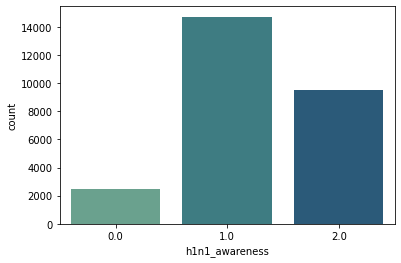

In [46]:
sns.countplot(x="h1n1_awareness",data=df_vacc,palette='crest')

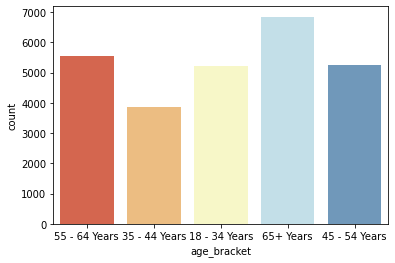

In [48]:
sns.countplot(x="age_bracket",data=df_vacc,palette='RdYlBu')  

In [8]:
#Checking for missing values
df_vacc.isnull().sum()

unique_id                        0
h1n1_worry                      92
h1n1_awareness                 116
antiviral_medication            71
contact_avoidance              208
bought_face_mask                19
wash_hands_frequently           42
avoid_large_gatherings          87
reduced_outside_home_cont       82
avoid_touch_face               128
dr_recc_h1n1_vacc             2160
dr_recc_seasonal_vacc         2160
chronic_medic_condition        971
cont_child_undr_6_mnths        820
is_health_worker               804
has_health_insur             12274
is_h1n1_vacc_effective         391
is_h1n1_risky                  388
sick_from_h1n1_vacc            395
is_seas_vacc_effective         462
is_seas_risky                  514
sick_from_seas_vacc            537
age_bracket                      0
qualification                 1407
race                             0
sex                              0
income_level                  4423
marital_status                1408
housing_status      

Replacing categorical missing values with mode 

In [9]:
for column in ['h1n1_worry', 'h1n1_awareness', 'antiviral_medication', 'contact_avoidance','bought_face_mask']:
    df_vacc[column].fillna(df_vacc[column].mode()[0], inplace=True)

In [10]:
df_vacc.isnull().sum()

unique_id                        0
h1n1_worry                       0
h1n1_awareness                   0
antiviral_medication             0
contact_avoidance                0
bought_face_mask                 0
wash_hands_frequently           42
avoid_large_gatherings          87
reduced_outside_home_cont       82
avoid_touch_face               128
dr_recc_h1n1_vacc             2160
dr_recc_seasonal_vacc         2160
chronic_medic_condition        971
cont_child_undr_6_mnths        820
is_health_worker               804
has_health_insur             12274
is_h1n1_vacc_effective         391
is_h1n1_risky                  388
sick_from_h1n1_vacc            395
is_seas_vacc_effective         462
is_seas_risky                  514
sick_from_seas_vacc            537
age_bracket                      0
qualification                 1407
race                             0
sex                              0
income_level                  4423
marital_status                1408
housing_status      

In [11]:
for column in ['wash_hands_frequently', 'avoid_large_gatherings', 'reduced_outside_home_cont', 'avoid_touch_face','dr_recc_h1n1_vacc','sick_from_seas_vacc']:
    df_vacc[column].fillna(df_vacc[column].mode()[0], inplace=True)

In [12]:
df_vacc.isnull().sum()

unique_id                        0
h1n1_worry                       0
h1n1_awareness                   0
antiviral_medication             0
contact_avoidance                0
bought_face_mask                 0
wash_hands_frequently            0
avoid_large_gatherings           0
reduced_outside_home_cont        0
avoid_touch_face                 0
dr_recc_h1n1_vacc                0
dr_recc_seasonal_vacc         2160
chronic_medic_condition        971
cont_child_undr_6_mnths        820
is_health_worker               804
has_health_insur             12274
is_h1n1_vacc_effective         391
is_h1n1_risky                  388
sick_from_h1n1_vacc            395
is_seas_vacc_effective         462
is_seas_risky                  514
sick_from_seas_vacc              0
age_bracket                      0
qualification                 1407
race                             0
sex                              0
income_level                  4423
marital_status                1408
housing_status      

Replacing Numerical missing values with mean 

In [30]:
mean_value=df_vacc['chronic_medic_condition'].mean()
df_vacc['chronic_medic_condition'].fillna(value=mean_value,inplace=True)

In [31]:
mean_value=df_vacc['cont_child_undr_6_mnths'].mean()
df_vacc['cont_child_undr_6_mnths'].fillna(value=mean_value,inplace=True)

In [32]:
mean_value=df_vacc['is_health_worker'].mean()
df_vacc['is_health_worker'].fillna(value=mean_value,inplace=True)

In [33]:
mean_value=df_vacc['has_health_insur'].mean()
df_vacc['has_health_insur'].fillna(value=mean_value,inplace=True)

In [34]:
mean_value=df_vacc['is_h1n1_vacc_effective'].mean()
df_vacc['is_h1n1_vacc_effective'].fillna(value=mean_value,inplace=True)

In [35]:
mean_value=df_vacc['is_h1n1_risky'].mean()
df_vacc['is_h1n1_risky'].fillna(value=mean_value,inplace=True)

In [36]:
mean_value=df_vacc['dr_recc_seasonal_vacc'].mean()
df_vacc['dr_recc_seasonal_vacc'].fillna(value=mean_value,inplace=True)

In [37]:
mean_value=df_vacc['sick_from_h1n1_vacc'].mean()
df_vacc['sick_from_h1n1_vacc'].fillna(value=mean_value,inplace=True)

In [38]:
mean_value=df_vacc['is_seas_vacc_effective'].mean()
df_vacc['is_seas_vacc_effective'].fillna(value=mean_value,inplace=True)

In [39]:
mean_value=df_vacc['is_seas_risky'].mean()
df_vacc['is_seas_risky'].fillna(value=mean_value,inplace=True)

In [49]:
df_vacc.isnull().sum()

unique_id                       0
h1n1_worry                      0
h1n1_awareness                  0
antiviral_medication            0
contact_avoidance               0
bought_face_mask                0
wash_hands_frequently           0
avoid_large_gatherings          0
reduced_outside_home_cont       0
avoid_touch_face                0
dr_recc_h1n1_vacc               0
dr_recc_seasonal_vacc           0
chronic_medic_condition         0
cont_child_undr_6_mnths         0
is_health_worker                0
has_health_insur                0
is_h1n1_vacc_effective          0
is_h1n1_risky                   0
sick_from_h1n1_vacc             0
is_seas_vacc_effective          0
is_seas_risky                   0
sick_from_seas_vacc             0
age_bracket                     0
qualification                1407
race                            0
sex                             0
income_level                 4423
marital_status               1408
housing_status               2042
employment    

Most of the missing values has been replaced

## Step 3: Building the model

 Defining input and output features

Here, in the input features most of the irrelavent features has been removed to improve the model's accuracy.

["sick_from_seas_vacc","age_bracket","qualification","race","sex","no_of_adults","no_of_children","housing_status","employment","census_msa","income_level","marital_status"]

The above features has been dropped 

In [41]:
X=df_vacc.drop(["sick_from_seas_vacc","age_bracket","qualification","race","sex","no_of_adults","no_of_children","housing_status","employment","census_msa","income_level","marital_status"],axis=1)
y=df_vacc["h1n1_vaccine"]

In [42]:
#we will split the input and output features into training and test sets using the train_test_split() method
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.30, random_state=0)


### Step 4: Defining a training logistic regression model



In [43]:

model=LogisticRegression()
model.fit(X_train,y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


LogisticRegression()

Now we will train this logistic regression model using the input (X_train) and output (y_train) training patterns. 

In [44]:
model.score(X_train, y_train)

0.9973253450304911

In [45]:
model.score(X_test, y_test)

0.9951329090228379

As we can see in the result, the model is 99% accurate in both training and testing data. Hence the model performs very well